### <center>San Jose State University<br>Department of Applied Data Science<br><br>**DATA 200<br>Computational Programming for Data Analytics**<br><br>Spring 2024<br>Instructor: Ron Mak</center>

# Binary Search
#### If the list we're searching is sorted, we can do a binary search. We'll use sorted lists of different lengths containing even random values and search them for odd random values. We'll time each search, which will fail after going "all the way", and draw a graph of search times vs. list size.

In [32]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
def sorted_values(size):
    return list(range(0, 2*size, 2))

In [34]:
sorted_values(20)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [35]:
SEARCH_COUNT = 100_000
SIZES = list(range(0, 1_000_001, 100_000))

## Binary search function

In [36]:
def binary_search(target, values):
    """
    Perform a binary search of a sorted list
    for a target value.
    @param target the value to search for.
    @param values the sorted list.
    @return the tuple of 1 if found else 0
            and the elapsed time in seconds
    """
    found = 0
    start = time.time()
    
    low  = 0
    high = len(values) - 1

    while low <= high:
        mid = (low + high)//2

        # Found!
        if target == values[mid]:
            found = 1
            break

        # Next search lower half.
        elif target < values[mid]:
            high = mid - 1

        # Next search upper half.
        else:
            low = mid + 1
        
    elapsed_time = time.time() - start
    return found, elapsed_time

In [37]:
times = []

for size in SIZES:
    values = sorted_values(size)
    count = 0
    total_time = 0

    for _ in range(SEARCH_COUNT):
        target_value = random.randint(0, size)
        found, elapsed_time = binary_search(target_value, values)

        count += found
        total_time += elapsed_time

    times.append(total_time)
    print(f'{size = :9,d} {count = :6,d} {total_time = :f}')

size =         0 count =      0 total_time = 0.017442
size =   100,000 count = 49,872 total_time = 0.247033
size =   200,000 count = 49,859 total_time = 0.280423
size =   300,000 count = 50,150 total_time = 0.289390
size =   400,000 count = 49,981 total_time = 0.323004
size =   500,000 count = 49,991 total_time = 0.314749
size =   600,000 count = 49,993 total_time = 0.326566
size =   700,000 count = 50,091 total_time = 0.321426
size =   800,000 count = 50,151 total_time = 0.339466
size =   900,000 count = 50,163 total_time = 0.348330
size = 1,000,000 count = 50,139 total_time = 0.345617


In [38]:
log2_of_n = [np.log2(n + 1)/65 for n in SIZES]
log2_of_n

[0.0,
 0.2555331523279244,
 0.2709176567368305,
 0.27991704283282187,
 0.2863022166333831,
 0.291254945457098,
 0.2953016212253492,
 0.2987230378074748,
 0.30168680427391514,
 0.3043010319826573,
 0.30663953864643834]

/Users/rmak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rmak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rmak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rmak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0, 0.5, 'Search time in seconds')

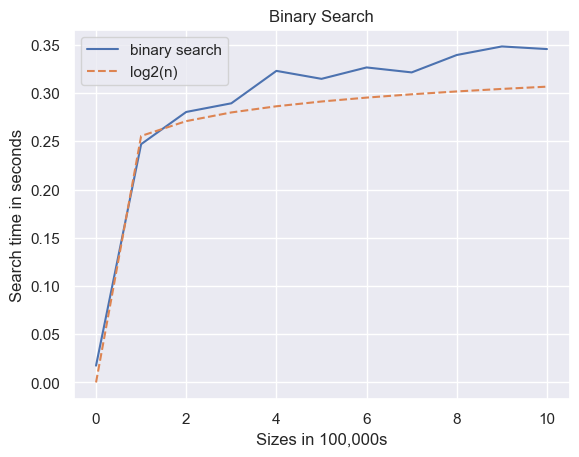

In [39]:
sns.set()

X = list(range(11))

sns.lineplot(x=X, y=times,     label='binary search')
sns.lineplot(x=X, y=log2_of_n, label='log2(n)', linestyle='dashed')

plt.title('Binary Search')
plt.xlabel('Sizes in 100,000s')
plt.ylabel('Search time in seconds')

In [ ]:
plt.close()